In [27]:
# Importing the Libraries
!pip install scikeras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from scikeras.wrappers import KerasRegressor


In [28]:
#2. Load Dataset
df = pd.read_csv("C:/Users/user/Downloads/TSLA.csv")
df.head()
df.info()
df.isnull().sum()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


(2416, 7)

In [29]:
#Handle Missing Values
df = df.dropna()   # Stock data should NOT be forward-filled blindly


In [30]:
#3. Use Adj Close as Target & Set Date Index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

data = df[['Adj Close']]


In [31]:
#4. Scale the Target Variable
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [32]:
#5. Create Time-Series Sequences

#Function to create input/output windows
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

#Use 60-day window
window = 60
X, y = create_sequences(scaled_data, window)

X.shape, y.shape


((2356, 60, 1), (2356, 1))

In [33]:
#6. Train/Test Split

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [34]:
#7. Build SimpleRNN Model

def build_rnn():
    model = Sequential([
        SimpleRNN(50, return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

rnn_model = build_rnn()
history_rnn = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0061 - val_loss: 0.0030
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - val_loss: 8.4602e-04
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.2818e-04 - val_loss: 0.0014
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.1098e-04 - val_loss: 5.2399e-04
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.5168e-04 - val_loss: 5.4742e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.0049e-04 - val_loss: 9.5542e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3591e-04 - val_loss: 5.2037e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6033e-04 - val_loss: 2.7392e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.2825e-04 - val_loss: 0.0010
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1693e-04 - val_loss: 3.7908e-04
Epoch 12/20


In [35]:
#8. Build LSTM Model
def build_lstm():
    model = Sequential([
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = build_lstm()
history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0036 - val_loss: 3.5196e-04
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.4747e-04 - val_loss: 3.5572e-04
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.5173e-04 - val_loss: 3.7827e-04
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.2236e-04 - val_loss: 3.4834e-04
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.9603e-04 - val_loss: 4.3305e-04
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.3044e-04 - val_loss: 3.8065e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1058e-04 - val_loss: 3.2292e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4781e-04 - val_loss: 3.9230e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.3452e-04 - val_loss: 2.9832e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4483e-04 - val_loss: 2.9170e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.1388e-04 - 

In [36]:
#9. Predictions (1-day Ahead)
pred_1day = lstm_model.predict(X_test)
pred_1day = scaler.inverse_transform(pred_1day)
actual = scaler.inverse_transform(y_test)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step 


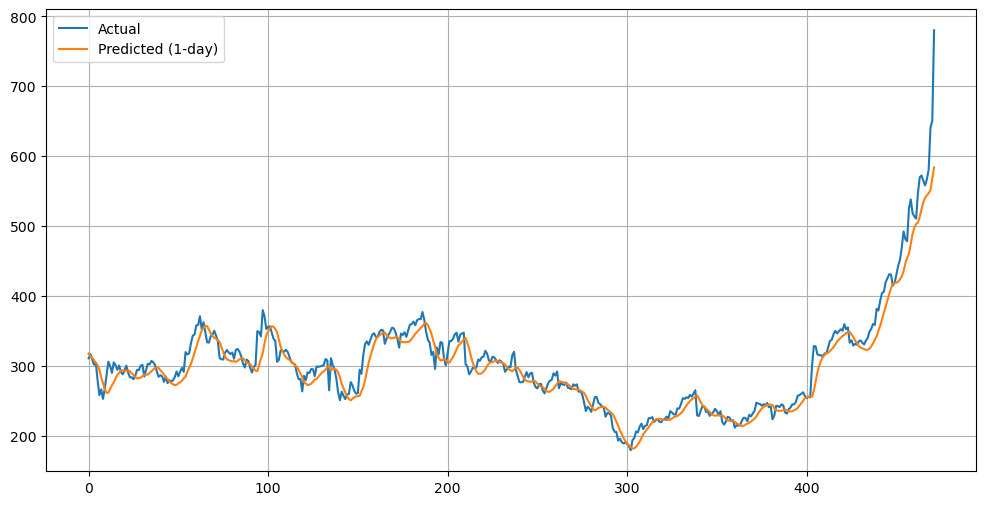

In [37]:
#plot
plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual")
plt.plot(pred_1day, label="Predicted (1-day)")
plt.grid()
plt.legend()
plt.show()


In [38]:
#10. Predict 5-Day and 10-Day Ahead Values

#Function for multi-step forecasting
def forecast_future(model, last_sequence, steps):
    seq = last_sequence.copy()
    predictions = []
    for _ in range(steps):
        pred = model.predict(seq.reshape(1, seq.shape[0], 1))
        predictions.append(pred[0])
        seq = np.append(seq[1:], pred)
    return scaler.inverse_transform(predictions)
#Predict

last_seq = scaled_data[-window:]

pred_5day = forecast_future(lstm_model, last_seq, 5)
pred_10day = forecast_future(lstm_model, last_seq, 10)

pred_5day, pred_10day


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


(array([[625.35614318],
        [631.90944846],
        [635.16717513],
        [634.84158466],
        [631.54391075]]),
 array([[625.35614318],
        [631.90944846],
        [635.16717513],
        [634.84158466],
        [631.54391075],
        [625.81223402],
        [618.10460395],
        [608.8159379 ],
        [598.2885887 ],
        [586.82113575]]))

In [39]:
#Manual Grid Search
param_grid = {
    "units": [32, 50, 64],
    "dropout": [0.1, 0.2, 0.3],
    "lr": [0.001, 0.005]
}

best_mse = float("inf")
best_params = None

for units in param_grid["units"]:
    for dropout in param_grid["dropout"]:
        for lr in param_grid["lr"]:
            model = create_lstm_model(units=units, dropout=dropout, lr=lr)
            history = model.fit(
                X_train, y_train,
                epochs=10,
                batch_size=32,
                validation_split=0.1,
                verbose=0
            )
            preds = model.predict(X_test)
            mse = mean_squared_error(
                scaler.inverse_transform(y_test),
                scaler.inverse_transform(preds)
            )
            print(f"units={units}, dropout={dropout}, lr={lr} -> MSE={mse:.4f}")

            if mse < best_mse:
                best_mse = mse
                best_params = (units, dropout, lr)

print("Best params (manual grid search):", best_params)
print("Best MSE:", best_mse)


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
units=32, dropout=0.1, lr=0.001 -> MSE=482.6602


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 
units=32, dropout=0.1, lr=0.005 -> MSE=352.3957


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
units=32, dropout=0.2, lr=0.001 -> MSE=660.6837


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step 
units=32, dropout=0.2, lr=0.005 -> MSE=406.9350


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 
units=32, dropout=0.3, lr=0.001 -> MSE=501.6390


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
units=32, dropout=0.3, lr=0.005 -> MSE=339.1728


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 
units=50, dropout=0.1, lr=0.001 -> MSE=473.6459


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 
units=50, dropout=0.1, lr=0.005 -> MSE=424.7438


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 
units=50, dropout=0.2, lr=0.001 -> MSE=396.5515


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 
units=50, dropout=0.2, lr=0.005 -> MSE=420.5731


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 
units=50, dropout=0.3, lr=0.001 -> MSE=495.2673


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step 
units=50, dropout=0.3, lr=0.005 -> MSE=325.8032


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step 
units=64, dropout=0.1, lr=0.001 -> MSE=447.7891


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step 
units=64, dropout=0.1, lr=0.005 -> MSE=349.2411


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step 
units=64, dropout=0.2, lr=0.001 -> MSE=476.9950


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step 
units=64, dropout=0.2, lr=0.005 -> MSE=364.9398


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step 
units=64, dropout=0.3, lr=0.001 -> MSE=756.1031


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step 
units=64, dropout=0.3, lr=0.005 -> MSE=393.8893
Best params (manual grid search): (50, 0.3, 0.005)
Best MSE: 325.80324375604334


In [40]:
#Train the Final LSTM Model Using Best Hyperparameters
best_units, best_dropout, best_lr = best_params

final_model = create_lstm_model(
    units=best_units,
    dropout=best_dropout,
    lr=best_lr
)

history_final = final_model.fit(
    X_train, y_train,
    epochs=20,          # train longer since this is final model
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0023 - val_loss: 4.7922e-04
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.2715e-04 - val_loss: 3.1138e-04
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1799e-04 - val_loss: 5.3025e-04
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8270e-04 - val_loss: 7.5881e-04
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.5432e-04 - val_loss: 3.5421e-04
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4814e-04 - val_loss: 8.1453e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.7173e-04 - val_loss: 2.5990e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2697e-04 - val_loss: 5.1129e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1117e-04 - val_loss: 3.1324e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6460e-04 - val_loss: 2.9035e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5380e-04 - val_loss: 3

In [41]:
#Evaluate Final Model on Test Set

final_preds = final_model.predict(X_test)
final_preds_inv = scaler.inverse_transform(final_preds)
y_test_inv = scaler.inverse_transform(y_test)

final_mse = mean_squared_error(y_test_inv, final_preds_inv)
print("Final Tuned Model Test MSE:", final_mse)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step 
Final Tuned Model Test MSE: 286.72140398471873


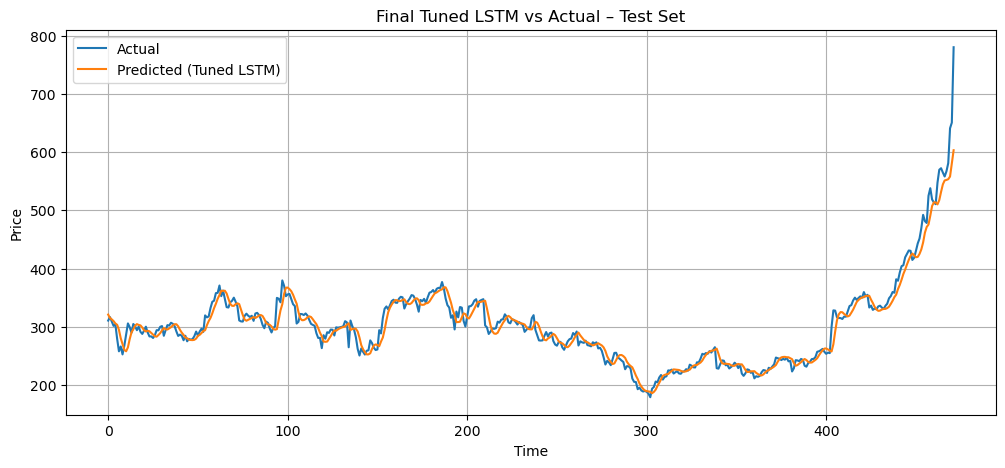

In [43]:
#Plot Actual vs Predicted
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label="Actual")
plt.plot(final_preds_inv, label="Predicted (Tuned LSTM)")
plt.title("Final Tuned LSTM vs Actual – Test Set")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid()
plt.legend()
plt.show()


In [45]:
def forecast_future(model, last_sequence, steps):
    seq = last_sequence.copy()   # shape: (window, 1)
    predictions = []

    for _ in range(steps):
        # Predict next value – output shape: (1, 1)
        pred = model.predict(seq.reshape(1, seq.shape[0], seq.shape[1]), verbose=0)

        # Store the scalar value
        predictions.append(pred[0, 0])

        # Update the sequence: drop first row, append new prediction
        seq = np.vstack([seq[1:], pred])   # pred has shape (1, 1)

    # Convert list of scalars to shape (steps, 1)
    predictions = np.array(predictions).reshape(-1, 1)

    # Now inverse transform works (2D input)
    return scaler.inverse_transform(predictions)


In [46]:
last_seq = X_test[-1]   # shape: (window, 1)

pred_1day  = forecast_future(final_model, last_seq, 1)
pred_5days = forecast_future(final_model, last_seq, 5)
pred_10days= forecast_future(final_model, last_seq, 10)

print("Next 1-day  prediction:", pred_1day.flatten())
print("Next 5-day  prediction:", pred_5days.flatten())
print("Next 10-day prediction:", pred_10days.flatten())


Next 1-day  prediction: [603.12445]
Next 5-day  prediction: [603.12445 604.93256 601.8191  595.8948  588.45667]
Next 10-day prediction: [603.12445 604.93256 601.8191  595.8948  588.45667 580.2781  571.8114
 563.318   554.9468  546.7803 ]
